# 1. Import packages
----------

In [10]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import re

In [2]:
%cd /data/p_dsi/teams2023/team7/

/gpfs52/data/p_dsi/teams2023/team7


# 2. Extract paths that are needed 
------

## 2.1 Remove yearly tire sales

In [3]:
paths = glob.glob('tire_sales_201*.csv')
paths.remove('tire_sales_2017.csv')
paths.remove('tire_sales_2016.csv')
paths.remove('tire_sales_2015.csv')
paths.remove('tire_sales_2018.csv')
len(paths)

43

## 2.2 Sort the paths by time

In [4]:
# Define a function to extract the datetime from a path string
def extract_datetime(path):
    filename = os.path.basename(path)
    datetime_str = filename.split('_')[2].split('.')[0]
    return datetime.strptime(datetime_str, '%Y%m%d')

# Sort the list of paths by datetime using the extract_datetime function as the key
path_list = sorted(paths, key=extract_datetime)

# Print the sorted list of paths
print(path_list)

['tire_sales_20150430.csv', 'tire_sales_20150531.csv', 'tire_sales_20150630.csv', 'tire_sales_20150731.csv', 'tire_sales_20150831.csv', 'tire_sales_20150930.csv', 'tire_sales_20151031.csv', 'tire_sales_20151130.csv', 'tire_sales_20151231.csv', 'tire_sales_20160131.csv', 'tire_sales_20160229.csv', 'tire_sales_20160331.csv', 'tire_sales_20160430.csv', 'tire_sales_20160531.csv', 'tire_sales_20160630.csv', 'tire_sales_20160731.csv', 'tire_sales_20160831.csv', 'tire_sales_20160930.csv', 'tire_sales_20161031.csv', 'tire_sales_20161130.csv', 'tire_sales_20161231.csv', 'tire_sales_20170131.csv', 'tire_sales_20170228.csv', 'tire_sales_20170331.csv', 'tire_sales_20170430.csv', 'tire_sales_20170531.csv', 'tire_sales_20170630.csv', 'tire_sales_20170731.csv', 'tire_sales_20170831.csv', 'tire_sales_20170930.csv', 'tire_sales_20171031.csv', 'tire_sales_20171130.csv', 'tire_sales_20171231.csv', 'tire_sales_20180131.csv', 'tire_sales_20180228.csv', 'tire_sales_20180331.csv', 'tire_sales_20180430.csv', 

# 3. Read data and make visulization plots
--------

## 3.1 Read vehicle data

In [6]:
vehicle = pd.read_csv('/data/p_dsi/teams2023/bridgestone_data/data/vehicle.csv',sep = "|")

## 3.2 Join vehicle data to every monthly tire sales data and visulize them

### 3.2.1 Visualize "MAKE"

In [13]:
tire_sales = pd.read_csv('tire_sales_20171031.csv')

,Unnamed: 0,STORE_ID,TRAN_ID,DATE,ARTICLE_ID,INDIV_ID,VEHICLE_ID,UNITS,SALES
0,23,6572,991684160,2017-10-31,3447,519083824.0,961419113,2.0,131.98
1,49,23787,991785770,2017-10-13,1407,514054336.0,946562231,1.0,35.64
2,72,29327,991791910,2017-10-27,96025,454662856.0,1,1.0,0.00
3,112,15253,992199120,2017-10-29,189769,518931220.0,961917981,2.0,277.98
4,130,26484,991742380,2017-10-14,7013138,486895284.0,935459043,0.0,0.00
...,...,...,...,...,...,...,...,...,...
690629,15800795,19623,880262320,2017-10-13,48136,NaN,345403523,4.0,299.04
690630,15800798,19046,880324690,2017-10-30,3561,NaN,365808595,2.0,335.10
690631,15800799,19453,880267240,2017-10-13,15148,NaN,365226853,4.0,361.84
690632,15800800,21563,880205550,2017-10-06,148045,NaN,721436445,2.0,299.72


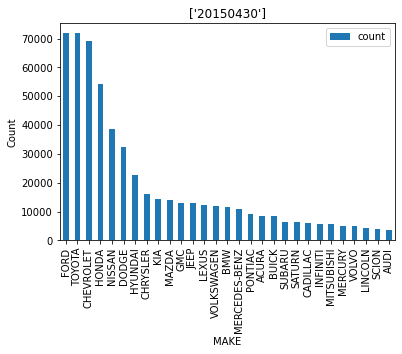

               count
MAKE                
FORD           71833
TOYOTA         71805
CHEVROLET      69315
HONDA          54110
NISSAN         38597
DODGE          32295
HYUNDAI        22820
CHRYSLER       15945
KIA            14454
MAZDA          13890
GMC            13097
JEEP           12910
LEXUS          12127
VOLKSWAGEN     12114
BMW            11615
MERCEDES-BENZ  11073
PONTIAC         9315
ACURA           8355
BUICK           8325
SUBARU          6426
SATURN          6325
CADILLAC        5997
INFINITI        5666
MITSUBISHI      5654
MERCURY         5170
VOLVO           4884
LINCOLN         4241
SCION           3837
AUDI            3478


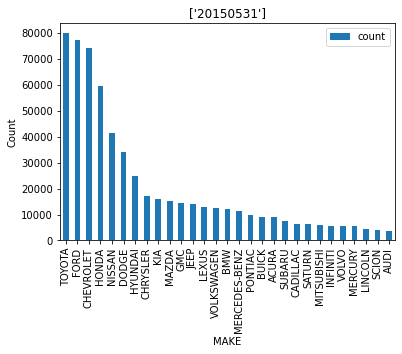

               count
MAKE                
TOYOTA         79965
FORD           77280
CHEVROLET      74378
HONDA          59667
NISSAN         41340
DODGE          34303
HYUNDAI        25061
CHRYSLER       17029
KIA            15960
MAZDA          15085
GMC            14439
JEEP           14234
LEXUS          12902
VOLKSWAGEN     12542
BMW            11986
MERCEDES-BENZ  11450
PONTIAC         9678
BUICK           8977
ACURA           8895
SUBARU          7406
CADILLAC        6457
SATURN          6413
MITSUBISHI      5876
INFINITI        5712
VOLVO           5567
MERCURY         5390
LINCOLN         4331
SCION           4029
AUDI            3583


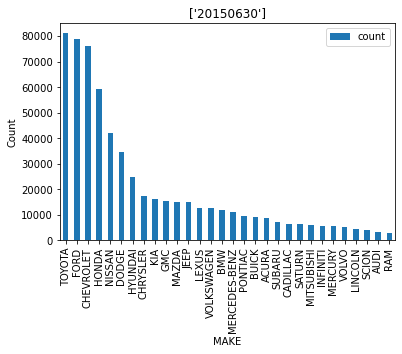

               count
MAKE                
TOYOTA         81147
FORD           78896
CHEVROLET      76254
HONDA          59507
NISSAN         42261
DODGE          34642
HYUNDAI        24808
CHRYSLER       17590
KIA            16218
GMC            15449
MAZDA          15074
JEEP           15042
LEXUS          12778
VOLKSWAGEN     12547
BMW            11741
MERCEDES-BENZ  10947
PONTIAC         9473
BUICK           9191
ACURA           8816
SUBARU          7406
CADILLAC        6542
SATURN          6319
MITSUBISHI      5897
INFINITI        5773
MERCURY         5601
VOLVO           5074
LINCOLN         4365
SCION           3976
AUDI            3302
RAM             3044


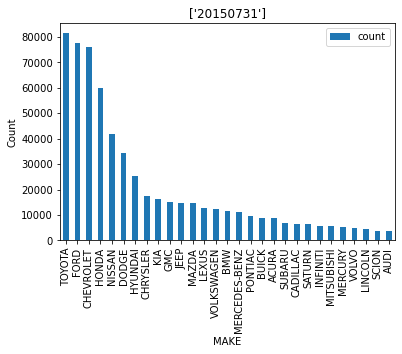

               count
MAKE                
TOYOTA         81411
FORD           77757
CHEVROLET      75845
HONDA          59801
NISSAN         41919
DODGE          34431
HYUNDAI        25156
CHRYSLER       17641
KIA            16366
GMC            15225
JEEP           14570
MAZDA          14528
LEXUS          12771
VOLKSWAGEN     12390
BMW            11429
MERCEDES-BENZ  11102
PONTIAC         9418
BUICK           8871
ACURA           8647
SUBARU          7008
CADILLAC        6419
SATURN          6417
INFINITI        5758
MITSUBISHI      5727
MERCURY         5412
VOLVO           5046
LINCOLN         4415
SCION           3774
AUDI            3597


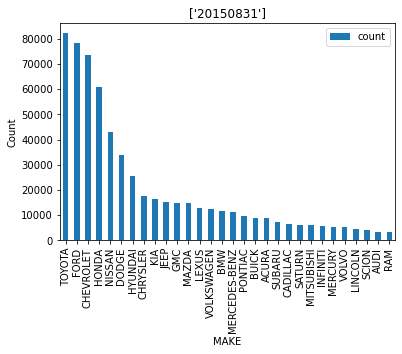

               count
MAKE                
TOYOTA         82197
FORD           78437
CHEVROLET      73443
HONDA          60959
NISSAN         43179
DODGE          34092
HYUNDAI        25726
CHRYSLER       17508
KIA            16567
JEEP           15196
GMC            14995
MAZDA          14995
LEXUS          12784
VOLKSWAGEN     12534
BMW            11730
MERCEDES-BENZ  11271
PONTIAC         9764
BUICK           9081
ACURA           8783
SUBARU          7468
CADILLAC        6414
SATURN          6274
MITSUBISHI      6101
INFINITI        5719
MERCURY         5297
VOLVO           5274
LINCOLN         4370
SCION           4041
AUDI            3485
RAM             3228


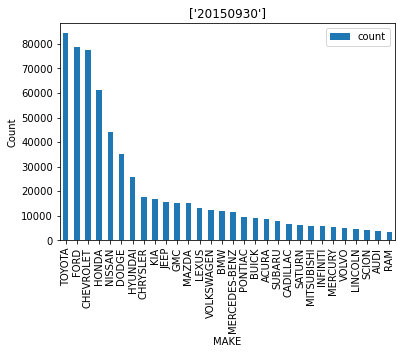

               count
MAKE                
TOYOTA         84283
FORD           78820
CHEVROLET      77546
HONDA          61329
NISSAN         44108
DODGE          35248
HYUNDAI        25931
CHRYSLER       17694
KIA            16824
JEEP           15815
GMC            15074
MAZDA          15071
LEXUS          13073
VOLKSWAGEN     12337
BMW            11982
MERCEDES-BENZ  11428
PONTIAC         9652
BUICK           9290
ACURA           8647
SUBARU          7880
CADILLAC        6673
SATURN          6372
MITSUBISHI      5935
INFINITI        5890
MERCURY         5419
VOLVO           5026
LINCOLN         4645
SCION           4313
AUDI            3733
RAM             3468


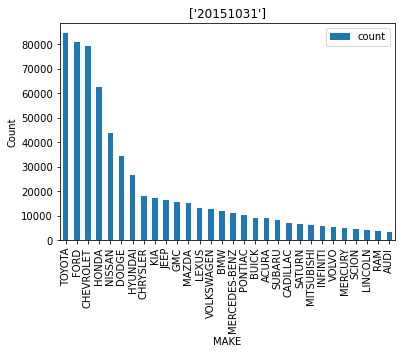

               count
MAKE                
TOYOTA         84525
FORD           80959
CHEVROLET      79467
HONDA          62806
NISSAN         44026
DODGE          34625
HYUNDAI        26662
CHRYSLER       18108
KIA            17252
JEEP           16647
GMC            15636
MAZDA          15210
LEXUS          13344
VOLKSWAGEN     12752
BMW            11849
MERCEDES-BENZ  11022
PONTIAC        10184
BUICK           9259
ACURA           9178
SUBARU          8538
CADILLAC        6960
SATURN          6518
MITSUBISHI      6117
INFINITI        6021
VOLVO           5321
MERCURY         5241
SCION           4617
LINCOLN         4412
RAM             3645
AUDI            3444


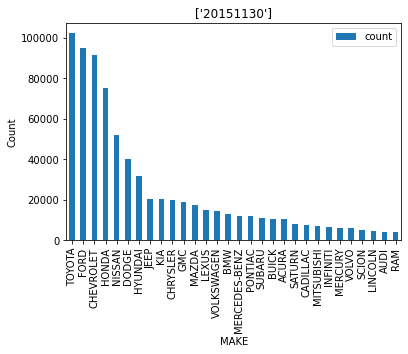

                count
MAKE                 
TOYOTA         102263
FORD            94995
CHEVROLET       91672
HONDA           75243
NISSAN          52039
DODGE           40108
HYUNDAI         32038
JEEP            20345
KIA             20308
CHRYSLER        20149
GMC             18970
MAZDA           17670
LEXUS           15038
VOLKSWAGEN      14714
BMW             13063
MERCEDES-BENZ   11993
PONTIAC         11903
SUBARU          11171
BUICK           10788
ACURA           10778
SATURN           7912
CADILLAC         7704
MITSUBISHI       6903
INFINITI         6846
MERCURY          6079
VOLVO            5917
SCION            4982
LINCOLN          4859
AUDI             4318
RAM              4074


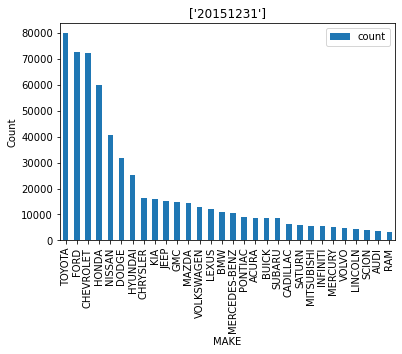

               count
MAKE                
TOYOTA         79869
FORD           72655
CHEVROLET      72285
HONDA          59894
NISSAN         40666
DODGE          31608
HYUNDAI        25041
CHRYSLER       16383
KIA            15813
JEEP           15376
GMC            14644
MAZDA          14605
VOLKSWAGEN     12781
LEXUS          12158
BMW            11084
MERCEDES-BENZ  10460
PONTIAC         9125
ACURA           8561
BUICK           8511
SUBARU          8495
CADILLAC        6249
SATURN          5770
MITSUBISHI      5691
INFINITI        5683
MERCURY         5344
VOLVO           4810
LINCOLN         4257
SCION           4144
AUDI            3715
RAM             3359


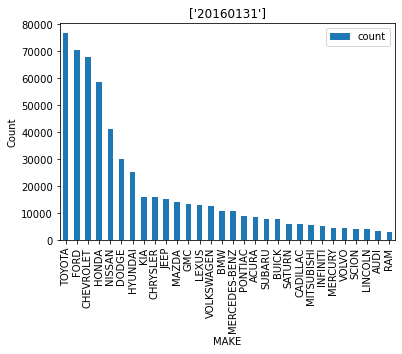

               count
MAKE                
TOYOTA         76721
FORD           70388
CHEVROLET      67911
HONDA          58552
NISSAN         41237
DODGE          30001
HYUNDAI        25402
KIA            16172
CHRYSLER       16137
JEEP           15201
MAZDA          14311
GMC            13345
LEXUS          13003
VOLKSWAGEN     12608
BMW            10780
MERCEDES-BENZ  10730
PONTIAC         9179
ACURA           8706
SUBARU          7966
BUICK           7900
SATURN          6085
CADILLAC        5926
MITSUBISHI      5610
INFINITI        5527
MERCURY         4741
VOLVO           4707
SCION           4273
LINCOLN         4133
AUDI            3675
RAM             3182


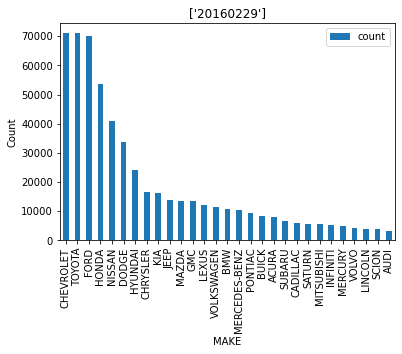

               count
MAKE                
CHEVROLET      70959
TOYOTA         70927
FORD           69960
HONDA          53754
NISSAN         40967
DODGE          33661
HYUNDAI        24106
CHRYSLER       16606
KIA            16218
JEEP           13917
MAZDA          13468
GMC            13418
LEXUS          11999
VOLKSWAGEN     11534
BMW            10812
MERCEDES-BENZ  10392
PONTIAC         9226
BUICK           8394
ACURA           7972
SUBARU          6771
CADILLAC        6140
SATURN          5644
MITSUBISHI      5561
INFINITI        5408
MERCURY         4988
VOLVO           4212
LINCOLN         4035
SCION           3828
AUDI            3325


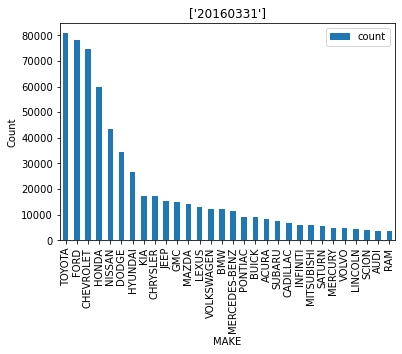

               count
MAKE                
TOYOTA         80760
FORD           78030
CHEVROLET      74681
HONDA          59725
NISSAN         43566
DODGE          34483
HYUNDAI        26787
KIA            17385
CHRYSLER       17224
JEEP           15260
GMC            15053
MAZDA          14126
LEXUS          12889
VOLKSWAGEN     12370
BMW            12309
MERCEDES-BENZ  11385
PONTIAC         9293
BUICK           9158
ACURA           8545
SUBARU          7708
CADILLAC        6871
INFINITI        5830
MITSUBISHI      5823
SATURN          5687
MERCURY         5015
VOLVO           4857
LINCOLN         4434
SCION           4158
AUDI            3697
RAM             3546


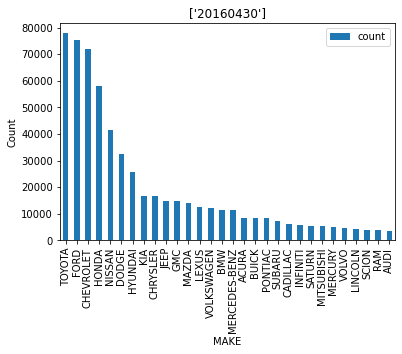

               count
MAKE                
TOYOTA         77847
FORD           75347
CHEVROLET      72106
HONDA          58027
NISSAN         41660
DODGE          32381
HYUNDAI        25567
KIA            16851
CHRYSLER       16537
JEEP           14671
GMC            14665
MAZDA          14156
LEXUS          12617
VOLKSWAGEN     12245
BMW            11557
MERCEDES-BENZ  11323
ACURA           8450
BUICK           8397
PONTIAC         8372
SUBARU          7356
CADILLAC        6231
INFINITI        5641
SATURN          5315
MITSUBISHI      5239
MERCURY         4866
VOLVO           4795
LINCOLN         4221
SCION           3889
RAM             3802
AUDI            3521


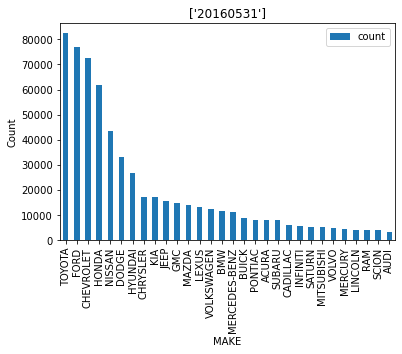

               count
MAKE                
TOYOTA         82398
FORD           76930
CHEVROLET      72632
HONDA          61737
NISSAN         43713
DODGE          33349
HYUNDAI        26769
CHRYSLER       17459
KIA            17152
JEEP           15565
GMC            15082
MAZDA          14198
LEXUS          13103
VOLKSWAGEN     12477
BMW            11683
MERCEDES-BENZ  11272
BUICK           8810
PONTIAC         8278
ACURA           8167
SUBARU          7993
CADILLAC        6283
INFINITI        5844
SATURN          5346
MITSUBISHI      5235
VOLVO           4864
MERCURY         4670
LINCOLN         4287
RAM             4017
SCION           3964
AUDI            3449


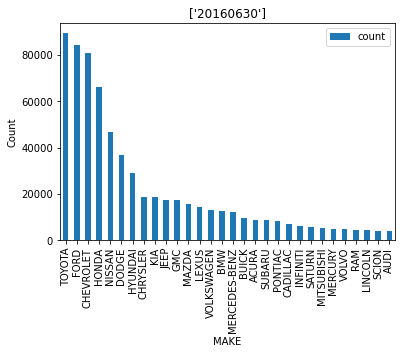

               count
MAKE                
TOYOTA         89305
FORD           84315
CHEVROLET      80830
HONDA          66235
NISSAN         46883
DODGE          36700
HYUNDAI        28882
CHRYSLER       18922
KIA            18840
JEEP           17582
GMC            17281
MAZDA          15638
LEXUS          14278
VOLKSWAGEN     13234
BMW            12519
MERCEDES-BENZ  12135
BUICK           9481
ACURA           8902
SUBARU          8714
PONTIAC         8331
CADILLAC        6954
INFINITI        6329
SATURN          5766
MITSUBISHI      5517
MERCURY         5065
VOLVO           5022
RAM             4684
LINCOLN         4524
SCION           4040
AUDI            3965


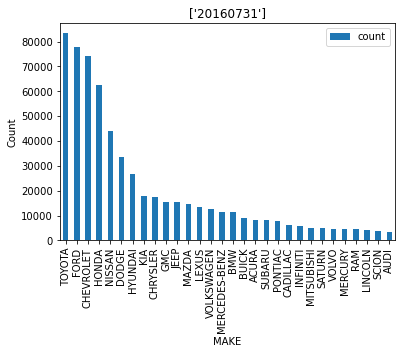

               count
MAKE                
TOYOTA         83314
FORD           77787
CHEVROLET      74061
HONDA          62678
NISSAN         43966
DODGE          33543
HYUNDAI        26653
KIA            17686
CHRYSLER       17390
GMC            15546
JEEP           15483
MAZDA          14607
LEXUS          13468
VOLKSWAGEN     12509
MERCEDES-BENZ  11450
BMW            11430
BUICK           8861
ACURA           8337
SUBARU          8052
PONTIAC         7884
CADILLAC        6134
INFINITI        5798
MITSUBISHI      5178
SATURN          5154
VOLVO           4647
MERCURY         4631
RAM             4558
LINCOLN         4197
SCION           3716
AUDI            3512


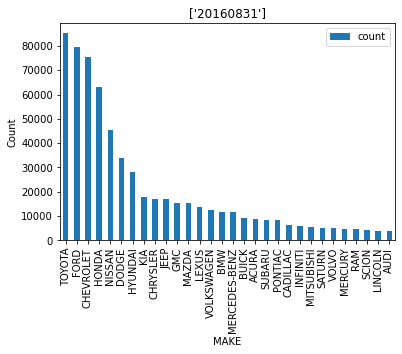

               count
MAKE                
TOYOTA         85187
FORD           79717
CHEVROLET      75544
HONDA          63286
NISSAN         45546
DODGE          33970
HYUNDAI        28264
KIA            18065
CHRYSLER       17197
JEEP           17092
GMC            15414
MAZDA          15292
LEXUS          13776
VOLKSWAGEN     12715
BMW            11884
MERCEDES-BENZ  11861
BUICK           9173
ACURA           8633
SUBARU          8542
PONTIAC         8202
CADILLAC        6548
INFINITI        5948
MITSUBISHI      5393
SATURN          5316
VOLVO           4950
MERCURY         4821
RAM             4645
SCION           4107
LINCOLN         4075
AUDI            3750


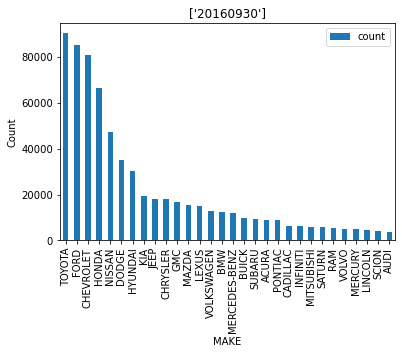

               count
MAKE                
TOYOTA         90388
FORD           85317
CHEVROLET      81070
HONDA          66472
NISSAN         47157
DODGE          35256
HYUNDAI        30199
KIA            19294
JEEP           18268
CHRYSLER       18265
GMC            16576
MAZDA          15666
LEXUS          14914
VOLKSWAGEN     13035
BMW            12321
MERCEDES-BENZ  12054
BUICK           9589
SUBARU          9392
ACURA           8806
PONTIAC         8760
CADILLAC        6506
INFINITI        6091
MITSUBISHI      5803
SATURN          5735
RAM             5369
VOLVO           5149
MERCURY         4950
LINCOLN         4526
SCION           4201
AUDI            3893


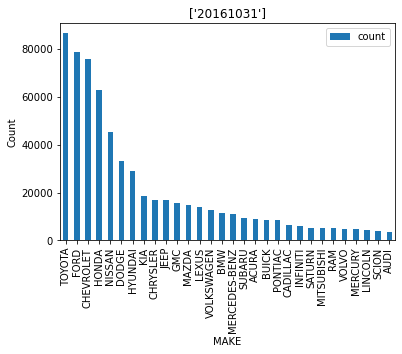

               count
MAKE                
TOYOTA         86527
FORD           78747
CHEVROLET      75911
HONDA          62913
NISSAN         45194
DODGE          33073
HYUNDAI        28938
KIA            18464
CHRYSLER       17071
JEEP           17035
GMC            15779
MAZDA          14861
LEXUS          13879
VOLKSWAGEN     12619
BMW            11533
MERCEDES-BENZ  11156
SUBARU          9269
ACURA           8744
BUICK           8603
PONTIAC         8501
CADILLAC        6407
INFINITI        5909
SATURN          5328
MITSUBISHI      5228
RAM             5010
VOLVO           4696
MERCURY         4627
LINCOLN         4218
SCION           4080
AUDI            3517


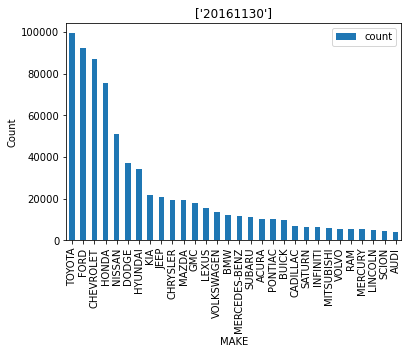

               count
MAKE                
TOYOTA         99333
FORD           92284
CHEVROLET      86855
HONDA          75610
NISSAN         51135
DODGE          36984
HYUNDAI        34454
KIA            21770
JEEP           20762
CHRYSLER       19414
MAZDA          19190
GMC            17829
LEXUS          15465
VOLKSWAGEN     13458
BMW            12257
MERCEDES-BENZ  11617
SUBARU         11422
ACURA          10316
PONTIAC        10263
BUICK           9842
CADILLAC        6848
SATURN          6608
INFINITI        6543
MITSUBISHI      6145
VOLVO           5691
RAM             5601
MERCURY         5537
LINCOLN         5134
SCION           4519
AUDI            4218


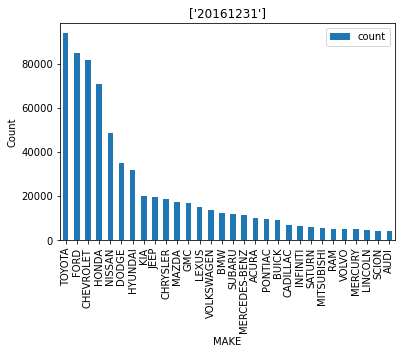

               count
MAKE                
TOYOTA         93684
FORD           84921
CHEVROLET      81754
HONDA          70631
NISSAN         48502
DODGE          35130
HYUNDAI        32014
KIA            20123
JEEP           19554
CHRYSLER       18622
MAZDA          17466
GMC            17120
LEXUS          15172
VOLKSWAGEN     13581
BMW            12369
SUBARU         11767
MERCEDES-BENZ  11668
ACURA          10040
PONTIAC         9881
BUICK           9347
CADILLAC        6880
INFINITI        6455
SATURN          6168
MITSUBISHI      5703
RAM             5237
VOLVO           5130
MERCURY         5070
LINCOLN         4592
SCION           4378
AUDI            4041


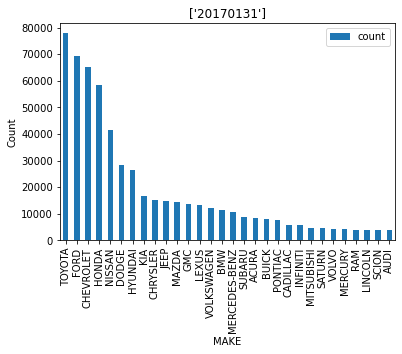

               count
MAKE                
TOYOTA         77853
FORD           69386
CHEVROLET      65331
HONDA          58513
NISSAN         41333
DODGE          28455
HYUNDAI        26470
KIA            16808
CHRYSLER       15207
JEEP           14949
MAZDA          14373
GMC            13512
LEXUS          13171
VOLKSWAGEN     12111
BMW            11345
MERCEDES-BENZ  10837
SUBARU          8891
ACURA           8472
BUICK           8080
PONTIAC         7506
CADILLAC        5980
INFINITI        5638
MITSUBISHI      4680
SATURN          4651
VOLVO           4472
MERCURY         4217
RAM             3996
LINCOLN         3926
SCION           3902
AUDI            3862


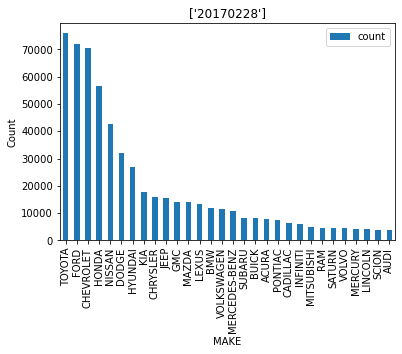

               count
MAKE                
TOYOTA         75878
FORD           71810
CHEVROLET      70383
HONDA          56751
NISSAN         42575
DODGE          32131
HYUNDAI        27007
KIA            17753
CHRYSLER       15896
JEEP           15574
GMC            14240
MAZDA          13997
LEXUS          13329
BMW            11753
VOLKSWAGEN     11644
MERCEDES-BENZ  10780
SUBARU          8295
BUICK           8208
ACURA           8001
PONTIAC         7509
CADILLAC        6314
INFINITI        6019
MITSUBISHI      4759
RAM             4545
SATURN          4533
VOLVO           4391
MERCURY         4071
LINCOLN         4041
SCION           3746
AUDI            3650


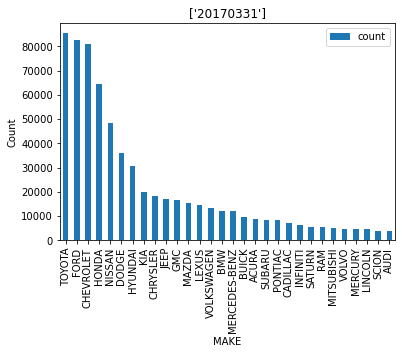

               count
MAKE                
TOYOTA         85345
FORD           82543
CHEVROLET      80911
HONDA          64626
NISSAN         48523
DODGE          35966
HYUNDAI        30570
KIA            20019
CHRYSLER       18158
JEEP           17217
GMC            16528
MAZDA          15510
LEXUS          14661
VOLKSWAGEN     13210
BMW            12259
MERCEDES-BENZ  12054
BUICK           9607
ACURA           8829
SUBARU          8565
PONTIAC         8238
CADILLAC        7189
INFINITI        6261
SATURN          5356
RAM             5339
MITSUBISHI      5303
VOLVO           4719
MERCURY         4659
LINCOLN         4542
SCION           3963
AUDI            3873


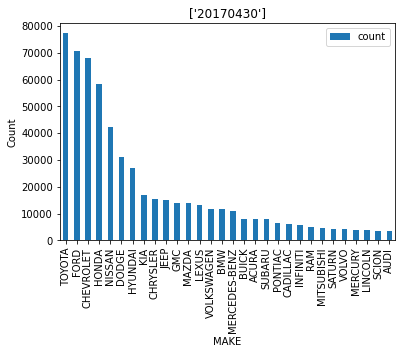

               count
MAKE                
TOYOTA         77261
FORD           70527
CHEVROLET      67922
HONDA          58362
NISSAN         42502
DODGE          31156
HYUNDAI        26969
KIA            17103
CHRYSLER       15476
JEEP           15091
GMC            13828
MAZDA          13802
LEXUS          13151
VOLKSWAGEN     11657
BMW            11621
MERCEDES-BENZ  10858
BUICK           8172
ACURA           8146
SUBARU          8141
PONTIAC         6458
CADILLAC        5963
INFINITI        5868
RAM             5010
MITSUBISHI      4582
SATURN          4386
VOLVO           4196
MERCURY         4070
LINCOLN         3834
SCION           3661
AUDI            3561


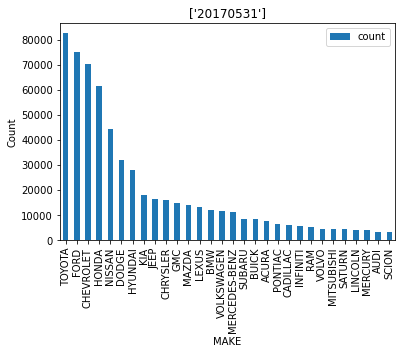

               count
MAKE                
TOYOTA         82537
FORD           75289
CHEVROLET      70234
HONDA          61620
NISSAN         44314
DODGE          31996
HYUNDAI        27871
KIA            18229
JEEP           16506
CHRYSLER       16043
GMC            14922
MAZDA          14227
LEXUS          13483
BMW            12081
VOLKSWAGEN     11668
MERCEDES-BENZ  11348
SUBARU          8534
BUICK           8407
ACURA           7892
PONTIAC         6690
CADILLAC        6288
INFINITI        5917
RAM             5393
VOLVO           4589
MITSUBISHI      4503
SATURN          4366
LINCOLN         4156
MERCURY         4098
AUDI            3502
SCION           3424


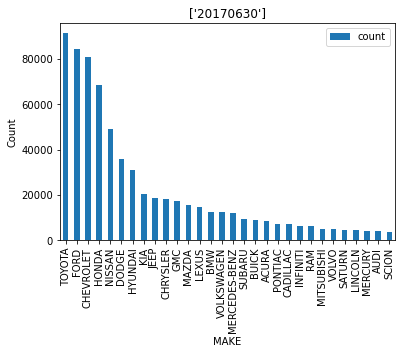

               count
MAKE                
TOYOTA         91284
FORD           84207
CHEVROLET      80785
HONDA          68321
NISSAN         48974
DODGE          35824
HYUNDAI        31157
KIA            20440
JEEP           18690
CHRYSLER       18262
GMC            17409
MAZDA          15501
LEXUS          14554
BMW            12715
VOLKSWAGEN     12534
MERCEDES-BENZ  12119
SUBARU          9546
BUICK           9221
ACURA           8584
PONTIAC         7083
CADILLAC        7036
INFINITI        6457
RAM             6331
MITSUBISHI      4887
VOLVO           4835
SATURN          4681
LINCOLN         4563
MERCURY         4201
AUDI            3976
SCION           3791


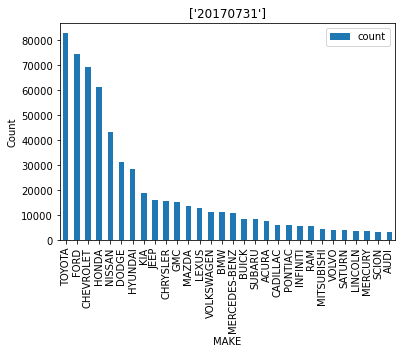

               count
MAKE                
TOYOTA         82809
FORD           74408
CHEVROLET      69489
HONDA          61422
NISSAN         43391
DODGE          31252
HYUNDAI        28453
KIA            19014
JEEP           16220
CHRYSLER       15690
GMC            15374
MAZDA          13782
LEXUS          12993
VOLKSWAGEN     11485
BMW            11430
MERCEDES-BENZ  11038
BUICK           8453
SUBARU          8413
ACURA           7922
CADILLAC        6154
PONTIAC         6125
INFINITI        5677
RAM             5600
MITSUBISHI      4537
VOLVO           4190
SATURN          3979
LINCOLN         3910
MERCURY         3778
SCION           3509
AUDI            3296


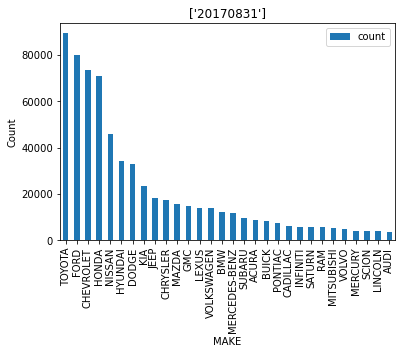

               count
MAKE                
TOYOTA         89436
FORD           79933
CHEVROLET      73818
HONDA          71093
NISSAN         46070
HYUNDAI        34385
DODGE          33090
KIA            23447
JEEP           18157
CHRYSLER       17647
MAZDA          15893
GMC            14874
LEXUS          13946
VOLKSWAGEN     13932
BMW            12292
MERCEDES-BENZ  11763
SUBARU          9758
ACURA           8655
BUICK           8419
PONTIAC         7651
CADILLAC        6434
INFINITI        5964
SATURN          5934
RAM             5753
MITSUBISHI      5257
VOLVO           4989
MERCURY         4208
SCION           4121
LINCOLN         3900
AUDI            3428


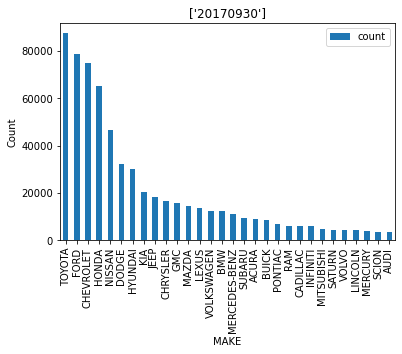

               count
MAKE                
TOYOTA         87530
FORD           78731
CHEVROLET      74970
HONDA          65107
NISSAN         46554
DODGE          32282
HYUNDAI        30335
KIA            20418
JEEP           18562
CHRYSLER       16525
GMC            15613
MAZDA          14678
LEXUS          13805
VOLKSWAGEN     12369
BMW            12268
MERCEDES-BENZ  11070
SUBARU          9648
ACURA           8848
BUICK           8778
PONTIAC         6849
RAM             6276
CADILLAC        6271
INFINITI        5973
MITSUBISHI      4792
SATURN          4582
VOLVO           4405
LINCOLN         4244
MERCURY         4106
SCION           3629
AUDI            3456


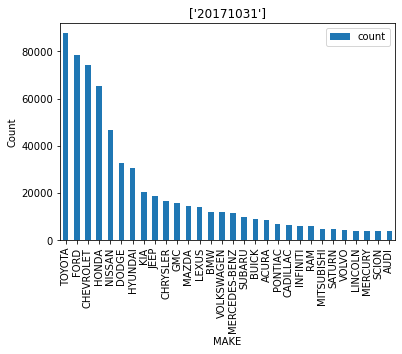

               count
MAKE                
TOYOTA         87657
FORD           78301
CHEVROLET      74357
HONDA          65259
NISSAN         46705
DODGE          32686
HYUNDAI        30806
KIA            20645
JEEP           18686
CHRYSLER       16568
GMC            15873
MAZDA          14690
LEXUS          14272
BMW            12086
VOLKSWAGEN     11939
MERCEDES-BENZ  11554
SUBARU          9976
BUICK           8874
ACURA           8672
PONTIAC         6791
CADILLAC        6490
INFINITI        6198
RAM             6021
MITSUBISHI      4821
SATURN          4730
VOLVO           4473
LINCOLN         4176
MERCURY         4118
SCION           3992
AUDI            3843


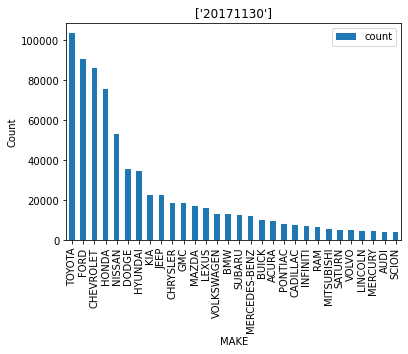

                count
MAKE                 
TOYOTA         103507
FORD            90792
CHEVROLET       85983
HONDA           75644
NISSAN          52967
DODGE           35567
HYUNDAI         34454
KIA             22897
JEEP            22510
CHRYSLER        18840
GMC             18747
MAZDA           17089
LEXUS           16252
VOLKSWAGEN      13419
BMW             13031
SUBARU          12741
MERCEDES-BENZ   12086
BUICK           10173
ACURA            9942
PONTIAC          7984
CADILLAC         7587
INFINITI         7071
RAM              6757
MITSUBISHI       5573
SATURN           5048
VOLVO            4992
LINCOLN          4690
MERCURY          4590
AUDI             4270
SCION            4116


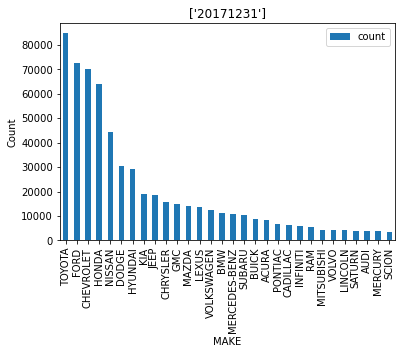

               count
MAKE                
TOYOTA         84709
FORD           72547
CHEVROLET      70313
HONDA          63843
NISSAN         44443
DODGE          30290
HYUNDAI        29295
KIA            19181
JEEP           18538
CHRYSLER       15892
GMC            14895
MAZDA          14084
LEXUS          13877
VOLKSWAGEN     12270
BMW            11142
MERCEDES-BENZ  10627
SUBARU         10563
BUICK           8592
ACURA           8369
PONTIAC         6893
CADILLAC        6139
INFINITI        6034
RAM             5405
MITSUBISHI      4429
VOLVO           4230
LINCOLN         4111
SATURN          4000
AUDI            3753
MERCURY         3657
SCION           3632


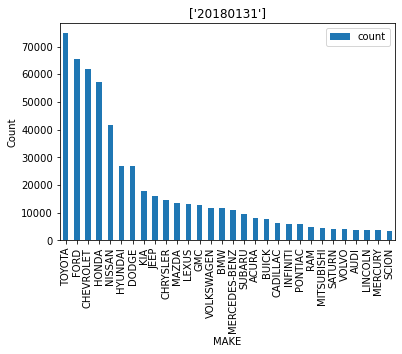

               count
MAKE                
TOYOTA         74753
FORD           65400
CHEVROLET      61981
HONDA          57335
NISSAN         41676
HYUNDAI        27020
DODGE          26753
KIA            17898
JEEP           16109
CHRYSLER       14493
MAZDA          13423
LEXUS          13230
GMC            12608
VOLKSWAGEN     11786
BMW            11536
MERCEDES-BENZ  11088
SUBARU          9486
ACURA           8029
BUICK           7832
CADILLAC        6208
INFINITI        6072
PONTIAC         6061
RAM             4903
MITSUBISHI      4421
SATURN          4073
VOLVO           3965
AUDI            3835
LINCOLN         3820
MERCURY         3669
SCION           3554


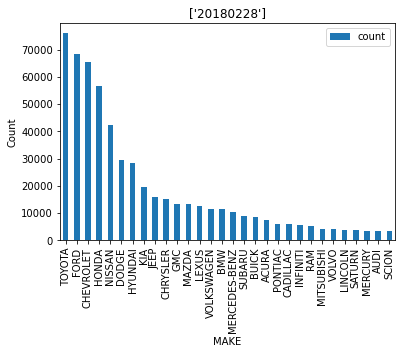

               count
MAKE                
TOYOTA         75990
FORD           68265
CHEVROLET      65638
HONDA          56748
NISSAN         42229
DODGE          29599
HYUNDAI        28239
KIA            19498
JEEP           15949
CHRYSLER       15298
GMC            13380
MAZDA          13211
LEXUS          12712
VOLKSWAGEN     11554
BMW            11483
MERCEDES-BENZ  10530
SUBARU          8795
BUICK           8533
ACURA           7601
PONTIAC         6039
CADILLAC        6020
INFINITI        5629
RAM             5111
MITSUBISHI      4232
VOLVO           4010
LINCOLN         3957
SATURN          3837
MERCURY         3583
AUDI            3543
SCION           3342


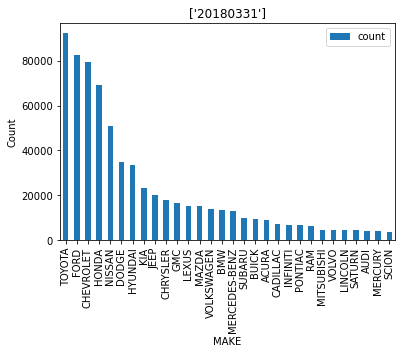

               count
MAKE                
TOYOTA         92102
FORD           82446
CHEVROLET      79155
HONDA          69268
NISSAN         51007
DODGE          35010
HYUNDAI        33376
KIA            23457
JEEP           20157
CHRYSLER       17991
GMC            16787
LEXUS          15461
MAZDA          15338
VOLKSWAGEN     13772
BMW            13491
MERCEDES-BENZ  12956
SUBARU          9940
BUICK           9663
ACURA           9135
CADILLAC        7346
INFINITI        6850
PONTIAC         6641
RAM             6496
MITSUBISHI      4671
VOLVO           4646
LINCOLN         4453
SATURN          4433
AUDI            4249
MERCURY         4045
SCION           3897


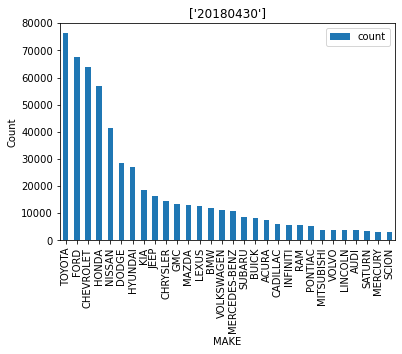

               count
MAKE                
TOYOTA         76267
FORD           67645
CHEVROLET      63994
HONDA          56877
NISSAN         41488
DODGE          28402
HYUNDAI        27159
KIA            18571
JEEP           16511
CHRYSLER       14468
GMC            13475
MAZDA          13187
LEXUS          12680
BMW            12049
VOLKSWAGEN     11166
MERCEDES-BENZ  10890
SUBARU          8805
BUICK           8170
ACURA           7543
CADILLAC        5983
INFINITI        5749
RAM             5507
PONTIAC         5245
MITSUBISHI      3831
VOLVO           3793
LINCOLN         3694
AUDI            3662
SATURN          3418
MERCURY         3220
SCION           3154


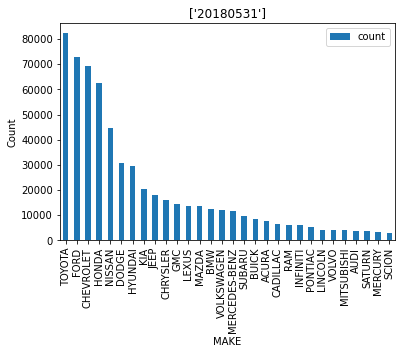

               count
MAKE                
TOYOTA         82288
FORD           72725
CHEVROLET      69196
HONDA          62636
NISSAN         44819
DODGE          30708
HYUNDAI        29549
KIA            20569
JEEP           17873
CHRYSLER       16089
GMC            14535
LEXUS          13824
MAZDA          13703
BMW            12612
VOLKSWAGEN     12107
MERCEDES-BENZ  11542
SUBARU          9628
BUICK           8634
ACURA           7702
CADILLAC        6461
RAM             6250
INFINITI        6210
PONTIAC         5178
LINCOLN         4113
VOLVO           4099
MITSUBISHI      4094
AUDI            3878
SATURN          3582
MERCURY         3522
SCION           3085


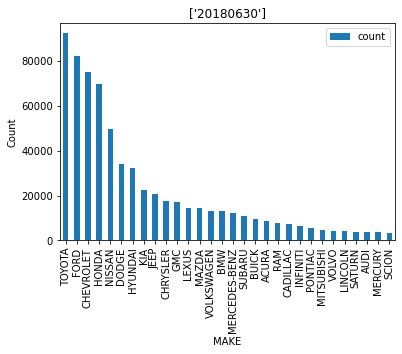

               count
MAKE                
TOYOTA         92365
FORD           82462
CHEVROLET      75339
HONDA          69906
NISSAN         49841
DODGE          33982
HYUNDAI        32138
KIA            22273
JEEP           20522
CHRYSLER       17636
GMC            16921
LEXUS          14481
MAZDA          14424
VOLKSWAGEN     13163
BMW            12914
MERCEDES-BENZ  12127
SUBARU         10815
BUICK           9466
ACURA           8564
RAM             7579
CADILLAC        7140
INFINITI        6540
PONTIAC         5756
MITSUBISHI      4436
VOLVO           4303
LINCOLN         4160
SATURN          3939
AUDI            3930
MERCURY         3685
SCION           3466


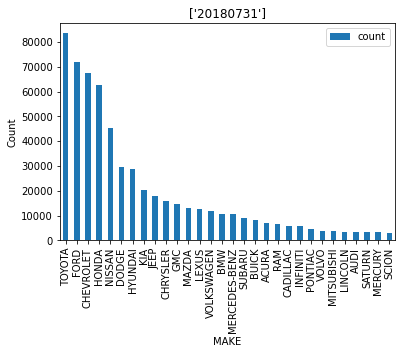

               count
MAKE                
TOYOTA         83546
FORD           71785
CHEVROLET      67553
HONDA          62610
NISSAN         45169
DODGE          29628
HYUNDAI        28797
KIA            20375
JEEP           17814
CHRYSLER       15729
GMC            14889
MAZDA          12930
LEXUS          12820
VOLKSWAGEN     11701
BMW            10802
MERCEDES-BENZ  10725
SUBARU          9145
BUICK           8109
ACURA           7132
RAM             6736
CADILLAC        5897
INFINITI        5772
PONTIAC         4809
VOLVO           3784
MITSUBISHI      3763
LINCOLN         3586
AUDI            3490
SATURN          3414
MERCURY         3218
SCION           3125


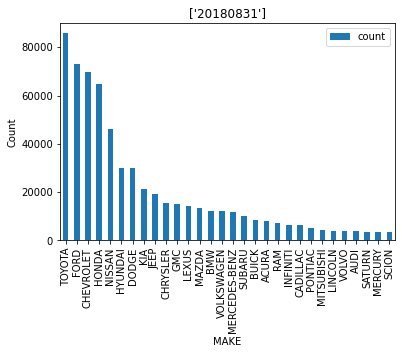

               count
MAKE                
TOYOTA         85773
FORD           72943
CHEVROLET      69715
HONDA          64731
NISSAN         46111
HYUNDAI        30122
DODGE          30039
KIA            21094
JEEP           19344
CHRYSLER       15403
GMC            14960
LEXUS          14115
MAZDA          13468
BMW            12181
VOLKSWAGEN     12073
MERCEDES-BENZ  11586
SUBARU         10273
BUICK           8317
ACURA           8000
RAM             7037
INFINITI        6381
CADILLAC        6320
PONTIAC         5211
MITSUBISHI      4234
LINCOLN         4090
VOLVO           3959
AUDI            3932
SATURN          3504
MERCURY         3459
SCION           3408


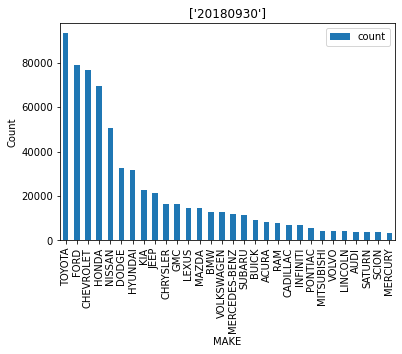

               count
MAKE                
TOYOTA         93162
FORD           79063
CHEVROLET      76495
HONDA          69315
NISSAN         50487
DODGE          32415
HYUNDAI        31840
KIA            22748
JEEP           21214
CHRYSLER       16550
GMC            16412
LEXUS          14704
MAZDA          14402
BMW            12914
VOLKSWAGEN     12619
MERCEDES-BENZ  12031
SUBARU         11495
BUICK           8992
ACURA           8370
RAM             7721
CADILLAC        7043
INFINITI        6747
PONTIAC         5443
MITSUBISHI      4323
VOLVO           4255
LINCOLN         4135
AUDI            4002
SATURN          3927
SCION           3626
MERCURY         3264


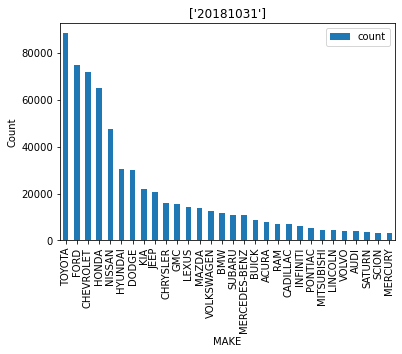

               count
MAKE                
TOYOTA         88428
FORD           74815
CHEVROLET      72023
HONDA          65171
NISSAN         47787
HYUNDAI        30579
DODGE          29864
KIA            21857
JEEP           20564
CHRYSLER       15778
GMC            15711
LEXUS          14292
MAZDA          13743
VOLKSWAGEN     12530
BMW            11703
SUBARU         11018
MERCEDES-BENZ  10975
BUICK           8909
ACURA           8038
RAM             7167
CADILLAC        6923
INFINITI        6357
PONTIAC         5387
MITSUBISHI      4298
LINCOLN         4283
VOLVO           4224
AUDI            4034
SATURN          3656
SCION           3318
MERCURY         3197


In [32]:
for path in path_list:
    month = re.findall(r'\d+', path)
    tire_sales = pd.read_csv(path)
    merge_df = pd.merge(tire_sales, vehicle, on = "VEHICLE_ID" ,how='left')
    make_counts = pd.DataFrame(merge_df.groupby("MAKE").size(), columns = ["count"])
    threshold = 3000
    make_counts_filtered = make_counts[make_counts['count'] >= threshold]
    make_counts_sorted = make_counts_filtered.sort_values('count', ascending=False)
    make_counts_sorted.plot(kind='bar')
    plt.title(month)
    plt.xlabel('MAKE')
    plt.ylabel('Count')
    plt.show()
    print(make_counts_sorted)

# 4. Findings
### Overall, the tire sales for all the vehicles made are increasing yearly. If we dig into the monthly scale, we see that tire sales in Oct, Nov, and Dec peak annually. This phenomenon makes sense because many people change tires in winter.